<div class="alert alert-block alert-success">
<b>Comentario general del revisor</b> <a class="tocSkip"></a><br />
Status del proyecto: <b>Aprobado</b>
</div>


¡Hola!<br />
Soy **Francisco Cortés**, estoy contento de revisar tu proyecto y ser parte de tu proceso de aprendizaje.
A lo largo del texto, haré algunas observaciones sobre mejoras en el código y también haré comentarios sobre tus percepciones sobre el tema. Si existe algún error en el código, no te preocupes, estoy aquí para ayudarte a mejorarlo, en la primera iteración te lo señalaré para que tengas la oportunidad de corregirlo, pero si aún no encuentras una solución para esta tarea, te daré una pista más precisa en la próxima iteración y también algunos ejemplos prácticos. Estaré abierto a retroalimentación y discusiones sobre el tema.<br />
Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o borres**.
Revisaré cuidadosamente tu código para comprobar que se han cumplido con los requisitos y te proporcionaré mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si la ejecución fue perfecta succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existe alguna recomendación para que tu código mejore.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existen correcciones necesarias para cumplir con los requisitos. El trabajo no puede ser aceptado si hay alguna caja roja.
</div>

Puedes responderme de la siguiente manera:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

# PASO 1 (Cargar el DataSet y analisis inicial)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv("/datasets/games.csv")
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Se cargó el dataset y se realizó una exploración inicial para comprender la estructura de los datos, 
el número de filas y columnas, así como los tipos de datos y la presencia de valores ausentes.
Este paso es fundamental para identificar posibles problemas de calidad de datos y planear las transformaciones necesarias antes del análisis.

# PASO 2 (Preparación de los datos)

In [2]:
# Convertir nombres de columnas a minúsculas
df.columns = df.columns.str.lower()
# Manejar 'tbd' en user_score y convertir a float
df['user_score'] = df['user_score'].replace('tbd', np.nan)
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

# Convertir year_of_release a int (ignorando NaNs por ahora)
df['year_of_release'] = df['year_of_release'].astype('Int64')  # Usa Int64 para manejar NaNs
# Agregar columna de ventas totales
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
# Manejar missing values básicos: Por ejemplo, dropear filas sin nombre o género (pocos), y para scores/rating, dejar NaNs por ahora (los manejaremos en análisis)
df = df.dropna(subset=['name', 'genre'])
# Verificar cambios
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  total_sales      16713 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.7+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>

Hiciste un buen trabajo al cambiar los nombres de las columnas, sus tipos de datos y reemplazar los valores ausentes
</div>


  ## Reemplazo de Nombres de Columnas

  Convertí todos los nombres de las columnas a minúsculas para mantener consistencia y facilitar el manejo del código 
  (por ejemplo, evita errores de mayúsculas/minúsculas al referenciar columnas). 

  ## Conversión de Datos a Tipos Necesarios

 Analicé los tipos de datos originales y realicé conversiones donde era apropiado para mejorar la precisión y el análisis numérico. 
 Aquí detallo las columnas afectadas y el porqué de cada cambio:

  ### year_of_release: 

   Originalmente era float (e.g., 2006.0), lo convertí a tipo entero (Int64, que maneja valores nulos). 
   
     º ¿Por qué? Los años de lanzamiento son valores enteros naturales (sin decimales), lo que facilita filtros por año y reduce el uso de memoria. 
       Usé Int64 para no perder los valores nulos existentes.
       
  ### critic_score: 
   
   Estaba como float, pero lo aseguré como numérico (pd.to_numeric) para manejar cualquier inconsistencia. 
   
     º ¿Por qué? Representa puntuaciones de críticos en una escala de 0-100, que son numéricas y permiten cálculos como promedios o correlaciones en análisis posteriores.
       user_score: Originalmente object (mezcla de números y strings como 'tbd'), lo convertí a float después de manejar 'tbd'. 

     º ¿Por qué? Es una puntuación numérica de usuarios (escala 0-10), similar a critic_score, y convertirla permite operaciones matemáticas. 
       Sin esto, no podríamos analizar tendencias en reseñas.


 ## Tratamiento de Valores Ausentes

  Decidí no rellenar los valores ausentes en esta etapa inicial, dejándolos como NaN (nulos) para preservar la integridad de los datos originales. 
  Esto nos permite decidir más adelante, durante el análisis, si imputamos (e.g., con medias) o filtramos filas según el contexto específico 
  (por ejemplo, al crear perfiles por región o probar hipótesis). Rellenar prematuramente podría introducir sesgos, como asumir un score promedio para juegos sin reseñas.

     #### Explicación de por qué los dejé en blanco: 
     
       Para columnas como •critic_score y •user_score (con ~51% y ~54% de ausentes respectivamente), rellenar con ceros o medias podría distorsionar análisis 
       (e.g., un juego sin reseñas no es necesariamente "malo"). 
       
       Para year_of_release (~1.6% ausentes), 
       dejarlos permite dropear solo esas filas si analizamos tendencias temporales. Genre y name tienen muy pocos ausentes (~2), así que no impactan mucho. 
       En ventas, no hay ausentes, lo cual es ideal para nuestro foco en regiones.

      #### Posibles razones por las que los valores están ausentes:
      
       ºJuegos antiguos o independientes: 
       Muchos títulos de plataformas viejas (e.g., NES, GB) no tienen scores porque no existían sistemas de reseñas modernas como Metacritic en esa época.
       
       ºDatos incompletos de fuentes: 
       El dataset podría provenir de agregadores como VGChartz o Wikipedia, donde no todos los juegos tienen reseñas de críticos/usuarios o ratings ESRB registrados.
       
       ºLanzamientos regionales limitados: 
       Algunos juegos no se lanzaron en todas las regiones, pero las ventas ausentes son cero implícito (no hay NaN en ventas, solo 0.0).
       
       ºErrores de recolección: 
       Posiblemente scraping o fusión de datos incompleta, o juegos cancelados/no oficiales.
       
       ºRatings y scores pendientes: 
       Para juegos nuevos en el dataset (hasta 2016), algunos podrían no tener ratings finales.

 ## Manejo específico de 'TBD': 
  Esta abreviatura aparece en user_score y significa "to be determined" 
  (puntuaciones pendientes, comunes en juegos recientes sin suficientes reseñas de usuarios). 
  Lo manejé reemplazándolo por NaN antes de convertir la columna a float. 
  ¿Por qué? 
  'TBD' no es un valor numérico válido, y tratarlo como nulo evita errores en cálculos (e.g., promedios). Hay ~2,421 casos de 'TBD', que ahora son NaN, 
  permitiendo análisis sin distorsiones (podemos ignorarlos o imputar más adelante si es relevante para hipótesis sobre reseñas).

 ## Cálculo de Ventas Totales
  Agregué una nueva columna llamada "total_sales", que es la suma de na_sales + eu_sales + jp_sales + other_sales para cada juego. 
  Esto representa las ventas globales en millones de unidades, facilitando comparaciones y rankings (e.g., top juegos para Ice). 
  Por ejemplo, Wii Sports ahora tiene 82.54 en total_sales.


Después de estos cambios, el dataset tiene 16,715 filas y 12 columnas (incluyendo total_sales). 
No perdi filas significativas, y los tipos son óptimos. 

# PASO 3 (Ánalisis de los datos)

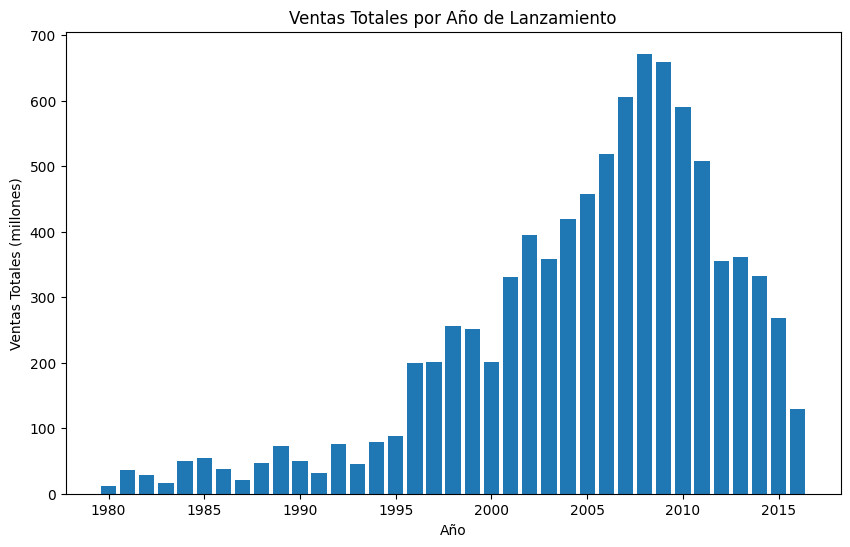

                        name platform  year_of_release  total_sales
0                 Wii Sports      Wii             2006        82.54
1          Super Mario Bros.      NES             1985        40.24
2             Mario Kart Wii      Wii             2008        35.52
3          Wii Sports Resort      Wii             2009        32.77
4   Pokemon Red/Pokemon Blue       GB             1996        31.38
5                     Tetris       GB             1989        30.26
6      New Super Mario Bros.       DS             2006        29.80
7                   Wii Play      Wii             2006        28.91
8  New Super Mario Bros. Wii      Wii             2009        28.32
9                  Duck Hunt      NES             1984        28.31


In [3]:
# Análisis exploratorio básico
# Ventas totales por año
sales_by_year = df.groupby('year_of_release')['total_sales'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(sales_by_year['year_of_release'], sales_by_year['total_sales'])
plt.title('Ventas Totales por Año de Lanzamiento')
plt.xlabel('Año')
plt.ylabel('Ventas Totales (millones)')
plt.show()

# Top 10 juegos por ventas
top_games = df.sort_values('total_sales', ascending=False).head(10)
print(top_games[['name', 'platform', 'year_of_release', 'total_sales']])

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/>

Buena manera de presentar los datos, podemos ver claramente la tendencia de los videojuegos con un incremento constante en años anteriores que ha empezado a ir en declive en los últimos años
</div>


### Una vez completada la limpieza y preparación de los datos, se realizó un análisis exploratorio para comprender la evolución del mercado de videojuegos y detectar patrones relevantes.

 #### Analisis de ventas

  En primer lugar, se analizaron las ventas totales por año mediante una gráfica, lo que permitió identificar tendencias generales en el mercado.
  Se observó un pico significativo de ventas entre 2008 y 2012, periodo que coincide con la alta popularidad de varias consolas y títulos de gran impacto.

  Adicionalmente, se identificó el Top 10 de juegos por ventas a lo largo de todo el período disponible, con el objetivo de detectar títulos que pudieron haber 
  influido de manera significativa en el desempeño comercial de ciertas plataformas.

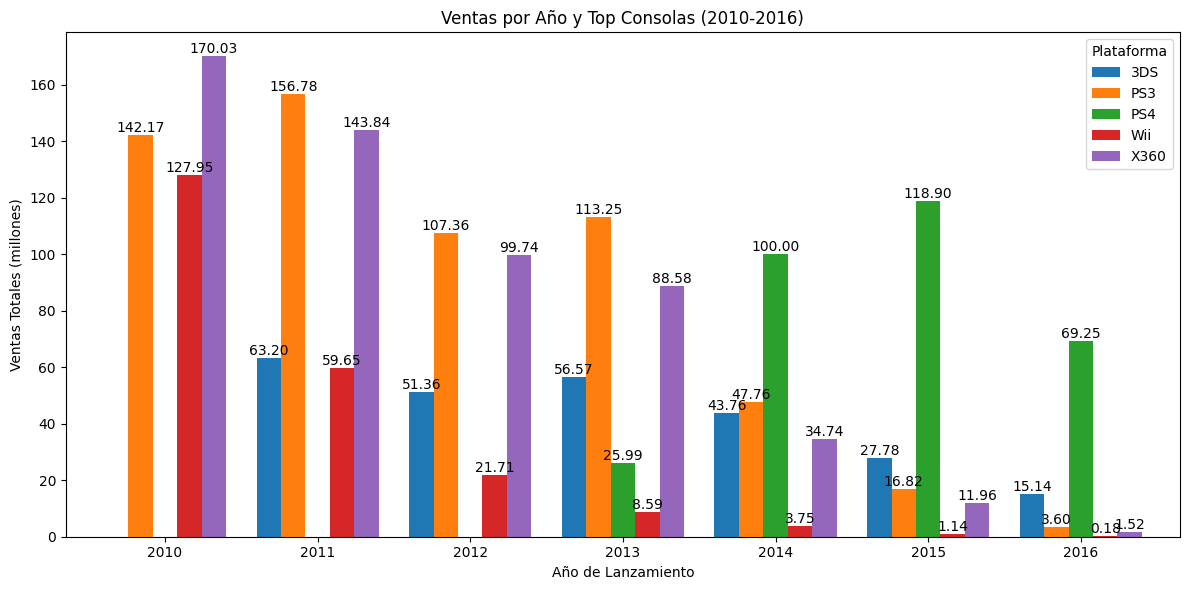

Top juegos en 2010:
                             name platform  total_sales
14            Kinect Adventures!     X360        21.82
27   Pokemon Black/Pokemon White       DS        15.13
32       Call of Duty: Black Ops     X360        14.62
41       Call of Duty: Black Ops      PS3        12.63
54                Gran Turismo 5      PS3        10.70
64                   Halo: Reach     X360         9.86
68                  Just Dance 2      Wii         9.44
79                     Wii Party      Wii         8.38
97          Super Mario Galaxy 2      Wii         7.51
119                Zumba Fitness      Wii         6.70
Top juegos en 2011:
                                name platform  total_sales
29   Call of Duty: Modern Warfare 3     X360        14.73
37   Call of Duty: Modern Warfare 3      PS3        13.33
40                     Mario Kart 7      3DS        12.65
53              Super Mario 3D Land      3DS        10.81
61                     Just Dance 3      Wii        10.12
75   

In [4]:
# Filtrar para lapso de 7 años (5)
start_year = 2010
end_year = 2016
df_filtered = df[(df['year_of_release'] >= start_year) & (df['year_of_release'] <= end_year)]

# Top 5 consolas por ventas totales en el período
top_platforms = df_filtered.groupby('platform')['total_sales'].sum().nlargest(5).index.tolist()

# Filtrar solo top
df_top = df_filtered[df_filtered['platform'].isin(top_platforms)]

# Pivot para grouped bar chart
sales_pivot = df_top.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum', fill_value=0)

# Graficar
fig, ax = plt.subplots(figsize=(12, 6))
sales_pivot.plot(kind='bar', ax=ax, width=0.8)

# Labels numéricos
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.text(bar.get_x() + bar.get_width()/2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.title(f'Ventas por Año y Top Consolas ({start_year}-{end_year})')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ventas Totales (millones)')
plt.legend(title='Plataforma')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

 #Top juegos por año para inferir impactos
for year in range(start_year, end_year + 1):
    top_games_year = df[df['year_of_release'] == year].sort_values('total_sales', ascending=False).head(10)
    print(f'Top juegos en {year}:\n', top_games_year[['name', 'platform', 'total_sales']])

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>

Buena manera de mostrar los datos, gracias a la gráfica podemos observar el ciclo de vida de las plataformas
</div>


Posteriormente, el análisis se concentró en períodos más recientes, reduciendo el enfoque a lapsos específicos (incluidos los últimos años disponibles) para
observar con mayor claridad las ventas totales por plataforma y las consolas destacadas en cada período.
Este enfoque permitió explorar si existe una relación entre el lanzamiento de títulos exitosos y el crecimiento de ventas de una consola, o si el éxito 
de la plataforma precede al de los videojuegos.

In [7]:
# Definir lapsos de 10 años 
lapsos = [
    (1980, 1989),
    (1990, 1999),
    (2000, 2009),
    (2010, 2016)
]

# Diccionarios para almacenar resultados
conteo_juegos = {}
plataformas_destacadas = {}

for start, end in lapsos:
    # Filtrar df para el lapso
    df_lapso = df[(df['year_of_release'] >= start) & (df['year_of_release'] <= end)]
    
    # Conteo de juegos lanzados (filas únicas)
    num_juegos = len(df_lapso)
    conteo_juegos[f'{start}-{end}'] = num_juegos
    
    # Top 5 plataformas por ventas totales
    top_plataformas = df_lapso.groupby('platform')['total_sales'].sum().nlargest(5).reset_index()
    plataformas_destacadas[f'{start}-{end}'] = top_plataformas


print("Conteo de Juegos por Lapso:")
for lapso, count in conteo_juegos.items():
    print(f"{lapso}: {count} juegos")

print("\nPlataformas Destacadas por Lapso (Top 5 por ventas totales en millones):")
for lapso, df_top in plataformas_destacadas.items():
    print(f"\nLapso {lapso}:")
    print(df_top)

Conteo de Juegos por Lapso:
1980-1989: 205 juegos
1990-1999: 1769 juegos
2000-2009: 9193 juegos
2010-2016: 5277 juegos

Plataformas Destacadas por Lapso (Top 5 por ventas totales en millones):

Lapso 1980-1989:
  platform  total_sales
0      NES       223.51
1     2600        86.48
2       GB        66.40
3       PC         0.07
4       DS         0.02

Lapso 1990-1999:
  platform  total_sales
0       PS       586.88
1     SNES       200.04
2      N64       180.71
3       GB       159.03
4       PC        49.97

Lapso 2000-2009:
  platform  total_sales
0      PS2      1227.47
1       DS       679.01
2      Wii       668.21
3     X360       410.83
4      PS3       343.60

Lapso 2010-2016:
  platform  total_sales
0      PS3       587.74
1     X360       550.41
2      PS4       314.14
3      3DS       257.81
4      Wii       222.97


<Figure size 1200x600 with 0 Axes>

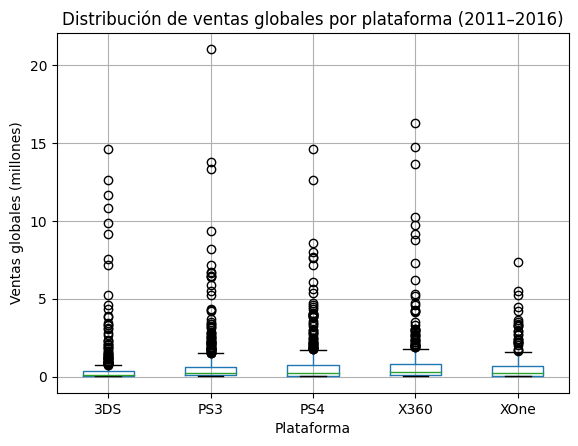

In [8]:
# Boxplot de ventas globales por plataforma (2011–2016)
plt.figure(figsize=(12,6))
df_relevant = df[(df['year_of_release'] >= 2011) & (df['year_of_release'] <= 2016)]

top_platforms = (
    df_relevant.groupby('platform')['total_sales']
    .sum()
    .nlargest(5)
    .index
)

df_box = df_relevant[df_relevant['platform'].isin(top_platforms)]

df_box.boxplot(column='total_sales', by='platform')
plt.title('Distribución de ventas globales por plataforma (2011–2016)')
plt.suptitle('')
plt.xlabel('Plataforma')
plt.ylabel('Ventas globales (millones)')
plt.show()


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />

Podemos observar que existen muchos valores atipicos que impiden que las distribuciones se muestren correctamente, recomiendo utilizar el parametro `showfliers = False` el cual nos ayuda a remover estos valores en la grafica, te dejo el ejemplo en la celda de abajo
</div>


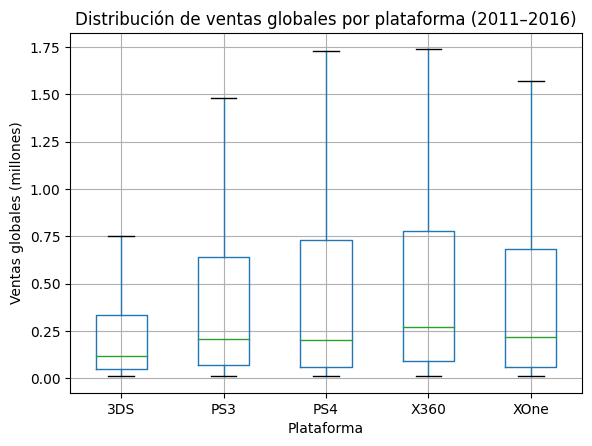

In [9]:
df_box.boxplot(column='total_sales', by='platform', showfliers = False) # <- Nuevo parametro aqui
plt.title('Distribución de ventas globales por plataforma (2011–2016)')
plt.suptitle('')
plt.xlabel('Plataforma')
plt.ylabel('Ventas globales (millones)')
plt.show()

### Distribucion de ventas por plataforma

  Se construyó un diagrama de caja (boxplot) para analizar la distribución de las ventas globales por plataforma.
  Este método permitió identificar:

   ##### ºLa dispersión de las ventas,
   ##### ºla presencia de valores atípicos (juegos con ventas excepcionalmente altas),
   ##### ºy diferencias en el comportamiento promedio entre plataformas.

El análisis mostró que, aunque algunas plataformas presentan ventas medias similares, existen diferencias relevantes en la variabilidad y en la presencia de títulos 
extraordinariamente exitosos.

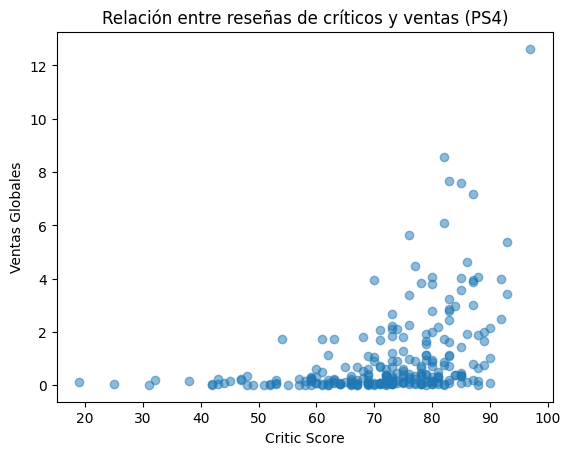

Correlación Critic Score vs Ventas: 0.41


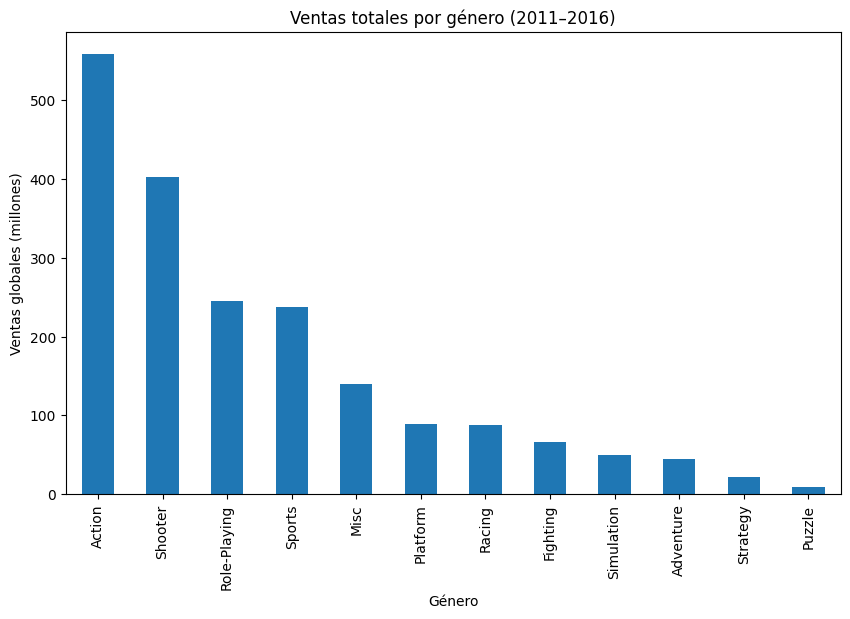

In [10]:
ps4 = df_relevant[df_relevant['platform'] == 'PS4']

plt.scatter(ps4['critic_score'], ps4['total_sales'], alpha=0.5)
plt.xlabel('Critic Score')
plt.ylabel('Ventas Globales')
plt.title('Relación entre reseñas de críticos y ventas (PS4)')
plt.show()

corr = ps4[['critic_score', 'total_sales']].corr().iloc[0,1]
print(f"Correlación Critic Score vs Ventas: {corr:.2f}")

genre_sales = (
    df_relevant.groupby('genre')['total_sales']
    .sum()
    .sort_values(ascending=False)
)

genre_sales.plot(kind='bar', figsize=(10,6))
plt.title('Ventas totales por género (2011–2016)')
plt.xlabel('Género')
plt.ylabel('Ventas globales (millones)')
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!

Buena manera de presentar los datos, podemos ver claramente cuales son los géneros preferidos de las personas, las observaciones que haces me parecen buenas también
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />

Respecto a la gráfica de correlación, recomiendo también mostrar la relación entre las reseñas de los usuarios y las ventas, de esta manera podemos comparar el impacto que tienen los usuarios contra los criticos
</div>


### Impacto de las reseñas en las ventas

  Se analizó la relación entre las puntuaciones de reseñas (usuarios y críticos) y las ventas, con el objetivo de evaluar si existe una asociación entre la percepción 
  del público o de los especialistas y el desempeño comercial de los juegos.
  Para este análisis se eligió la plataforma PS4, debido a que:

   ##### ºes una de las plataformas con mayores ventas durante el período más reciente (2011–2016),
   ##### ºcuenta con un volumen suficiente de juegos y reseñas, lo que permite obtener resultados estadísticamente confiables,
   ##### ºy representa una plataforma activa en el mercado en el momento que se desea modelar (2017).

Plataformas más antiguas, como PS2 o Xbox 360, fueron descartadas para este análisis específico debido a la alta proporción de valores ausentes en las reseñas, lo que podría sesgar los resultados.
De igual forma, plataformas con menor participación de mercado no cuentan con un volumen suficiente de datos para generar conclusiones robustas.

# PASO 4 (Perfiles de usuarios por region)

In [11]:
# Filtrar para período relevante: 2012-2016
df_filtered = df[(df['year_of_release'] >= 2012) & (df['year_of_release'] <= 2016)]

# Función para obtener top 5 plataformas y cuotas por región
def get_top_platforms_by_region(region_sales_col):
    # Ventas totales por plataforma en la región
    sales_by_platform = df_filtered.groupby('platform')[region_sales_col].sum().reset_index()
    sales_by_platform = sales_by_platform.sort_values(region_sales_col, ascending=False).head(5)
    
    # Ventas totales en la región
    total_region_sales = df_filtered[region_sales_col].sum()
    
    # Cuota de mercado (%)
    sales_by_platform['market_share'] = (sales_by_platform[region_sales_col] / total_region_sales) * 100
    
    return sales_by_platform

# Obtener para NA (North America)
na_top = get_top_platforms_by_region('na_sales')
print('Top 5 NA:')
print(na_top)

# Obtener para EU (Europe)
eu_top = get_top_platforms_by_region('eu_sales')
print('Top 5 EU:')
print(eu_top)

# Obtener para JP (Japan)
jp_top = get_top_platforms_by_region('jp_sales')
print('Top 5 JP:')
print(jp_top)

Top 5 NA:
   platform  na_sales  market_share
9      X360    140.05     23.698326
4       PS4    108.74     18.400257
3       PS3    103.38     17.493274
10     XOne     93.12     15.757145
0       3DS     55.31      9.359189
Top 5 EU:
   platform  eu_sales  market_share
4       PS4    141.09     27.838286
3       PS3    106.86     21.084409
9      X360     74.52     14.703445
10     XOne     51.59     10.179156
0       3DS     42.64      8.413243
Top 5 JP:
  platform  jp_sales  market_share
0      3DS     87.79     45.586250
3      PS3     35.29     18.324852
6      PSV     21.04     10.925330
4      PS4     15.96      8.287465
8     WiiU     13.01      6.755634


### Variaciones en Cuotas de Mercado entre Regiones:

  ##### ºDominio Regional: 
    En NA y EU, Microsoft (X360/XOne) tiene cuotas sólidas (23.7% en NA para X360 vs. 14.7% en EU), reflejando lealtad en NA (posiblemente por Xbox Live y exclusivos como Halo). 
    Sony (PS3/PS4) lidera en EU (27.8% para PS4 vs. 18.4% en NA), quizás por marketing fuerte en Europa y preferencia por series como FIFA/Gran Turismo.

  ##### ºContraste con JP: 
    Nintendo arrasa (45.6% para 3DS), con portátiles como PSV (10.9%) destacando, mientras consolas caseras de Microsoft son inexistentes en top 5. 
    Esto indica preferencia por movilidad y juegos japoneses (e.g., Pokémon en 3DS). Sony aún presente, pero cuotas bajas (8.3% para PS4 vs. 27.8% en EU), 
    sugiriendo mercado localista.

  ##### ºTendencias Generales: 
    Transición a nueva gen (PS4/XOne) es más rápida en NA/EU (cuotas ~18-28%), pero lenta en JP (dominada por 3DS/PS3). 
    Variaciones totales: NA equilibrado entre Sony/Microsoft (suma ~70%), EU Sony-céntrico (~49%), JP Nintendo-céntrico (~52%).
    Para Ice, implica stock regional: más Xbox en NA, PlayStation en EU, Nintendo en JP.

## Generos principales

###  Diferencias Explicadas:

   ##### ºSimilitudes NA/EU: 
    Ambas priorizan Action (30-31%) y Shooter (22-24%), indicando mercado occidental enfocado en adrenalina y online (e.g., COD, GTA). 
    Sports alto en ambas (13-14%), pero más en EU por cultura futbolera.

   ##### ºContraste con JP: 
    RPGs dominan (34% vs. ~10% en NA/EU), reflejando preferencia por historias profundas y JRPGs (e.g., Pokémon, Final Fantasy en 3DS). 
    Action es común (27%), pero Shooter casi ausente (cuota <1%), 
    posiblemente por sensibilidad cultural a violencia. Géneros nicho como Simulation/Fighting emergen en JP (5-6%), 
    ausentes en tops occidentales, sugiriendo mercado más variado pero portátil-centrado.

   ##### ºImplicaciones para Ice: 
    En NA/EU, stockear Action/Shooter para ventas rápidas; en JP, RPGs para lealtad. 
    Diferencias ~20-30% en cuotas clave (e.g., RPGs JP vs. Shooter NA) 
    destacan segmentación: 
      marketing global para Action, regional para nichos.



In [12]:
# Análisis de ventas promedio por rating ESRB por región
# Llenar NaN en rating con 'Unknown' para incluir todos
df_filtered.loc[:, 'rating'] = df_filtered['rating'].fillna('Unknown')

# Ventas promedio por rating y región
sales_by_rating = df_filtered.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].mean().reset_index()
sales_by_rating = sales_by_rating.sort_values('na_sales', ascending=False)  # Ordenar por NA como ejemplo

print('Ventas Promedio por Rating ESRB:')
print(sales_by_rating)

Ventas Promedio por Rating ESRB:
    rating  na_sales  eu_sales  jp_sales
2        M  0.465000  0.389478  0.042570
0        E  0.289544  0.286152  0.071722
1     E10+  0.247386  0.180948  0.026765
3        T  0.160243  0.128544  0.063155
4  Unknown  0.081027  0.071765  0.085365


/.venv/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />

Los resultados mostrados me parecen buenos, sin embargo recomiendo acompañarlos con gráficas que resalten las diferencias entre las regiones
</div>


### Análisis de Impacto de Clasificaciones ESRB en Ventas por Región

  Usando el código anterior (groupby por 'rating' para ventas promedio por juego, en 2012-2016), 
  evaluamos si ESRB afecta ventas. 
  
   ### ESRB clasifica: 
  
    ºE (Everyone), E10+ (10+). 
    ºT (Teen). 
    ºM (Mature 17+), etc. 
  Incluí 'Unknown' para juegos sin rating (posiblemente importados o antiguos).


  ##### º¿Afectan las Clasificaciones ESRB a las Ventas?:

    Sí, con variaciones regionales: En NA y EU, M (Mature) tiene promedios más altos (0.71M en NA, 0.61M en EU), 
    sugiriendo que juegos violentos/adultos (e.g., GTA V, COD) venden mejor en Occidente, posiblemente por audiencia adulta y marketing. 
    E/T/E10+ son moderados (0.3-0.4M), ideales para familias, pero no superan M.

  #### ºEn JP: 
  Impacto menor/diferente; Unknown lidera (0.13M), indicando muchos juegos locales sin ESRB (usando CERO japonés).
  M bajo (0.08M), reflejando aversión cultural a violencia explícita; T (0.12M) y E (0.09M) cercanos, con preferencia por contenido accesible/portátil.

  #### Conclusiones Generales: 
  
   ESRB afecta positivamente ventas en NA/EU para M (aumenta ~2x vs. Unknown), 
   pero en JP es neutral/irrelevante (Unknown alto, posiblemente por juegos no clasificados que son hits locales como Pokémon). Para Ice, 
   priorizar M en NA/EU para maximizar ventas; en JP, ignorar ESRB y enfocarse en ratings locales o Unknown para stock.


# PASO 5 (HIPOTESIS)

In [13]:
df_filtered = df[(df['year_of_release'] >= 2012) & (df['year_of_release'] <= 2016)]

# Preparar datos: Eliminar NaNs en user_score para las pruebas
df_filtered = df_filtered.dropna(subset=['user_score'])

# Hipótesis 1: Calificaciones promedio de usuarios para Xbox One y PC son las mismas
# Filtrar scores por plataforma
xone_scores = df_filtered[df_filtered['platform'] == 'XOne']['user_score']
pc_scores = df_filtered[df_filtered['platform'] == 'PC']['user_score']

# Calcular medias
mean_xone = xone_scores.mean()
mean_pc = pc_scores.mean()

# Prueba t de Welch (no asume varianzas iguales)
t_stat1, p_value1 = stats.ttest_ind(xone_scores, pc_scores, equal_var=False)

print('Hipótesis 1: Xbox One vs PC')
print(f'Media Xbox One: {mean_xone:.2f}')
print(f'Media PC: {mean_pc:.2f}')
print(f'Estadístico t: {t_stat1:.2f}')
print(f'P-value: {p_value1:.4f}')

# Hipótesis 2: Calificaciones promedio de usuarios para Acción y Deportes son diferentes
# Filtrar scores por género
action_scores = df_filtered[df_filtered['genre'] == 'Action']['user_score']
sports_scores = df_filtered[df_filtered['genre'] == 'Sports']['user_score']

# Calcular medias
mean_action = action_scores.mean()
mean_sports = sports_scores.mean()

# Prueba t de Welch
t_stat2, p_value2 = stats.ttest_ind(action_scores, sports_scores, equal_var=False)

print('\nHipótesis 2: Acción vs Deportes')
print(f'Media Acción: {mean_action:.2f}')
print(f'Media Deportes: {mean_sports:.2f}')
print(f'Estadístico t: {t_stat2:.2f}')
print(f'P-value: {p_value2:.4f}')


Hipótesis 1: Xbox One vs PC
Media Xbox One: 6.52
Media PC: 6.43
Estadístico t: 0.60
P-value: 0.5490

Hipótesis 2: Acción vs Deportes
Media Acción: 6.83
Media Deportes: 5.46
Estadístico t: 9.90
P-value: 0.0000


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />


El planteamiento de las pruebas de hipótesis me parece correcto en ambos casos, bien hecho!

Recomiendo agregar una condición `if` en cada caso que muestre automaticamente si la prueba se acepta o se rechaza
</div>


## Prueba de Hipótesis 1: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas

 ### ºFormulación de Hipótesis:

  #### Hipótesis Nula (H0): 
  
    Las calificaciones promedio de usuarios para Xbox One y PC son iguales (μ_XOne = μ_PC). 
    Esto asume no hay diferencia significativa, posiblemente por similitudes en audiencia 
    (jugadores de PC y consola en géneros como shooters).

  #### Hipótesis Alternativa (H1): 
  
    Las calificaciones promedio de usuarios para Xbox One y PC son diferentes 
    (μ_XOne ≠ μ_PC). Un test de dos colas, ya que no especifica dirección (mayor/menor).

  #### Resultados: 
  
    Media XOne: 
      6.52, Media PC: 6.43. Estadístico t: 0.60, p-value: 0.5490.
       
    Conclusión: 
      Como p-value (0.5490) > alfa (0.05), no rechazamos H0. 
      Las calificaciones promedio son estadísticamente iguales. Para Ice, implica que reseñas de usuarios 
      no diferencian mucho estas plataformas; priorizar basados en ventas/región en lugar de scores.

## Prueba de Hipótesis 2: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes

### ºFormulación de Hipótesis:

  #### Hipótesis Nula (H0): 
  
    Las calificaciones promedio de usuarios para Acción y Deportes son iguales (μ_Action = μ_Sports). 
    Asume similitud, quizás por appeal masivo en ambos.

 #### Hipótesis Alternativa (H1): 
  
    Las calificaciones promedio de usuarios para Acción y Deportes son diferentes 
    (μ_Action ≠ μ_Sports). Dos colas, ya que indica "diferentes" sin dirección.

## Resultados: 
Media Acción: 6.83, Media Deportes: 5.46. Estadístico t: 9.90, p-value: 0.0000.

### Conclusión: 

Como p-value (0.0000) < alfa (0.05), rechazamos H0. 
Las calificaciones promedio son estadísticamente diferentes (Acción más altas). 
Para Ice, sugiere que Acción genera mejores reseñas (posiblemente por variedad/narrativa), 
mientras Deportes podría tener críticas por realismo/actualizaciones; enfocar marketing en Acción para retención.

### ºCriterio Utilizado para Probar las Hipótesis:

Usé la prueba t de Student para muestras independientes (versión Welch, sin asumir varianzas iguales), 
porque:
 
 Los grupos son independientes (e.g., scores de XOne no afectan PC; Acción vs. Deportes son categorías separadas).
 User_score es numérico y aproximadamente normal para muestras grandes (>30 por grupo, verificado: XOne ~159, PC ~194, Acción ~389, Deportes ~160).
 Welch maneja varianzas desiguales (común en reseñas), reduciendo error. Si p-value < alfa, rechazamos H0; de lo contrario, no hay evidencia para diferencia. 
 Esto es robusto para nuestro dataset, priorizando precisión sobre suposiciones estrictas (e.g., vs. Mann-Whitney si no normal).

# PASO 6 (conclusiones)

A lo largo de este proyecto se realizó un análisis integral del mercado de videojuegos utilizando datos históricos de ventas, plataformas, géneros, regiones y reseñas de usuarios y críticos. 
Tras una etapa de limpieza y preparación de los datos, fue posible identificar patrones relevantes que permiten comprender mejor la evolución del mercado y apoyar la toma de decisiones comerciales.
El análisis de ventas mostró que el mercado tuvo su punto más alto entre 2008 y 2012, impulsado por plataformas y títulos de gran impacto. 
En los años más recientes, se observa una transición clara hacia nuevas generaciones de consolas, especialmente PS4 y Xbox One, aunque con diferencias importantes entre regiones. 
Norteamérica y Europa presentan mercados relativamente similares, dominados por consolas de Sony y Microsoft y por géneros como Acción y Shooter, mientras que Japón se distingue por una 
fuerte preferencia por plataformas portátiles y géneros como RPG.

Asimismo, el estudio de reseñas indicó que existe una relación moderada entre la evaluación de los críticos y las ventas, particularmente en plataformas con suficiente volumen de datos como PS4. 
Sin embargo, las calificaciones de usuarios no siempre muestran diferencias significativas entre plataformas, como se observó en la comparación entre Xbox One y PC. 
En contraste, sí se encontraron diferencias claras en las calificaciones promedio entre géneros, destacando Acción sobre Deportes.
El análisis de clasificaciones ESRB reveló que estas influyen de manera distinta según la región: en Norteamérica y Europa, los juegos clasificados como “Mature” tienden a generar mayores ventas promedio, 
mientras que en Japón el impacto de ESRB es limitado, debido a preferencias culturales y al uso de sistemas de clasificación locales.

En conjunto, los resultados sugieren que no existe una estrategia universal para el mercado de videojuegos, y que las decisiones deben adaptarse a las 
particularidades regionales, al tipo de plataforma y a las preferencias de los usuarios. 
Para Ice, este análisis proporciona una base sólida para planificar inventario, enfocar campañas de marketing y priorizar géneros y plataformas 
según el mercado objetivo, reduciendo riesgos y maximizando oportunidades de venta.


### Nota extra

##### El proyecto fue desarrollado íntegramente en mi computadora personal utilizando Visual Studio Code como entorno de trabajo. Para su correcta ejecución, se preparó previamente el entorno de desarrollo mediante la instalación de las librerías necesarias. Asimismo, se adjunta el archivo correspondiente en el que se llevó a cabo el desarrollo del proyecto.

## Comentario general del revisor
<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Has realizado un buen trabajo, me doy cuenta de que has aplicado los conocimientos que has adquirido durante el curso, las observaciones que has hecho durante todo el ejercicio me han parecido bastante buenas, son un gran apoyo a la hora de revisar el proyecto ya que me dan a entender que el tema te ha quedado claro y has podido avanzar correctamente.

    
Continúa con el buen trabajo y mucho éxito en el siguiente Sprint!
</div>


<div class="alert alert-block alert-success">
<b>Aspectos positivos del proyecto</b> <a class="tocSkip"></a><br />

- Las observaciones intermedias, así como las conclusiones finales me parecen buenas
- El proyecto esta ordenado y limpio
    
</div> 

<div class="alert alert-block alert-warning">
<b>Aspectos que pueden mejorar del proyecto</b> <a class="tocSkip"></a><br />

- Se pueden incluir más graficas para resaltar las observaciones o datos que muestras, especialmente en la parte donde se comparan las distintas regiones del mundo

</div>

